scanpy==1.4.4.post1 anndata==0.6.22.post1 umap==0.3.10 numpy==1.16.3 scipy==1.2.1 pandas==0.23.4 scikit-learn==0.20.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


... storing 'paul15_clusters' as categorical
Trying to set attribute `.uns` of view, making a copy.


running recipe zheng17
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts_all', counts per cell before normalization (adata.obs)
extracting highly variable genes
    finished (0:00:00)
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
    finished (0:00:00)
Calculating PHATE...
  Running PHATE on 2730 cells and 1000 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.19 seconds.
    Calculating KNN search...
    Calculated KNN search in 1.08 seconds.
    Calculating affinities...
    Calculated affinities in 0.06 seconds.
  Calculated graph and diffusion operator in 1.34 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.20 seconds.
    Calculating KMeans...
    Calculated KMeans in 10.85 seconds.
  Calculated landmark operator in 12.37 seconds.
  

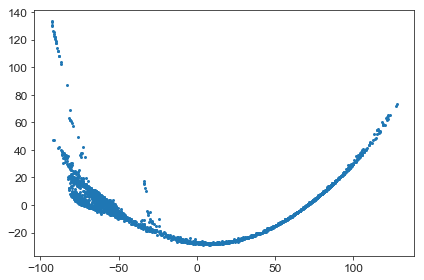

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scanpy as sc
import scprep, phate

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
results_file = '~/scRNAseq/paul15.h5ad'

adata = sc.datasets.paul15()

adata.X = adata.X.astype('float64')  # this is not required and results will be comparable without it
sc.pp.recipe_zheng17(adata)

phate_op = phate.PHATE()
data_phate = phate_op.fit_transform(adata.X)

scprep.plot.scatter2d(data_phate, c=adata.obs['paul15_clusters'].astype(object))

scanpy==1.4.4.post1 anndata==0.6.22.post1 umap==0.3.10 numpy==1.16.3 scipy==1.2.1 pandas==0.23.4 scikit-learn==0.20.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


... storing 'paul15_clusters' as categorical
Trying to set attribute `.uns` of view, making a copy.


Calculating PHATE...
  Running PHATE on 2730 cells and 3451 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.22 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.85 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.10 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.18 seconds.
    Calculating KMeans...
    Calculated KMeans in 9.40 seconds.
  Calculated landmark operator in 10.85 seconds.
  Calculating optimal t...
    Automatically selected t = 19
  Calculated optimal t in 0.79 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.30 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 32.33 seconds.
Calculated PHATE in 45.38 seconds.


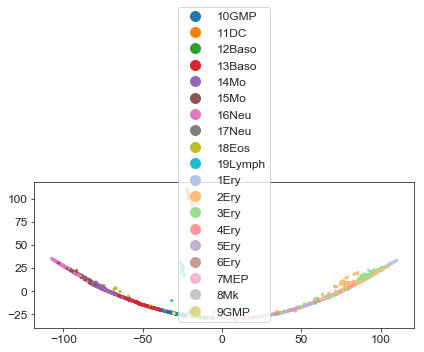

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scanpy as sc
import scprep, phate

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
results_file = '~/scRNAseq/paul15.h5ad'

adata = sc.datasets.paul15()

data = adata.X
data = scprep.normalize.library_size_normalize(data)
data = scprep.transform.sqrt(data)

phate_op = phate.PHATE()
data_phate = phate_op.fit_transform(data)



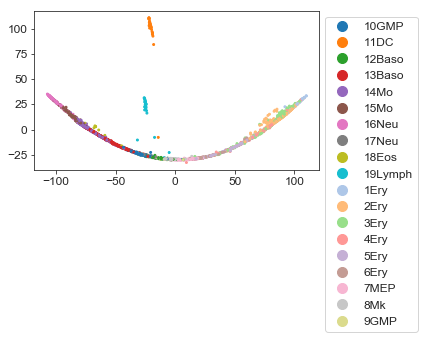

In [12]:
scprep.plot.scatter2d(data_phate, c=adata.obs['paul15_clusters'].astype(object), legend_anchor=(1,1))

In [13]:
import umap

In [14]:
data_umap = umap.UMAP().fit_transform(data)

In [19]:
plt.cm.tab20(len(uniq_clusters))

(0.6196078431372549, 0.8549019607843137, 0.8980392156862745, 1.0)

In [22]:
clusters = adata.obs['paul15_clusters'].astype(object)
uniq_clusters = np.unique(clusters)
cmap = {cl:plt.cm.tab20(np.arange(len(uniq_clusters)))[i] for i, cl in enumerate(uniq_clusters)}

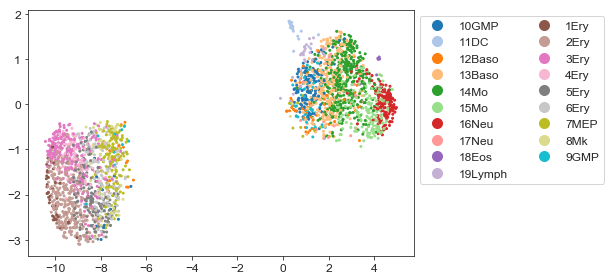

In [26]:
ax = scprep.plot.scatter2d(data_umap, c=adata.obs['paul15_clusters'].astype(object), cmap=cmap,
                     legend=False)

scprep.plot.tools.generate_legend(cmap, ax=ax, ncol=2, bbox_to_anchor=(1,1))

In [17]:
sc.pp.neighbors(adata, n_neighbors=4, n_pcs=20)
sc.tl.diffmap(adata)
sc.tl.dpt(adata)

dpt = adata.obs['dpt_pseudotime']

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:00)
computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.999448   0.99820924 0.99528885 0.99336076 0.99292904
     0.9880573  0.9867173  0.9836411  0.98068696 0.97770655 0.97683346
     0.9740238  0.97386956 0.97109574]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)
computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


In [31]:
adata.obs['paul15_clusters'].astype(object)

0          7MEP
1          15Mo
2          3Ery
3          15Mo
4          3Ery
5          15Mo
6          4Ery
7          2Ery
8          3Ery
9          2Ery
10         2Ery
11        17Neu
12         14Mo
13       13Baso
14         3Ery
15         7MEP
16         3Ery
17         3Ery
18         2Ery
19          8Mk
20         3Ery
21         9GMP
22          8Mk
23        10GMP
24         15Mo
25        16Neu
26         4Ery
27       13Baso
28        17Neu
29         3Ery
         ...   
2700      10GMP
2701       15Mo
2702      16Neu
2703       6Ery
2704       2Ery
2705     13Baso
2706       5Ery
2707       7MEP
2708    19Lymph
2709       6Ery
2710     13Baso
2711       2Ery
2712       11DC
2713       7MEP
2714     13Baso
2715       2Ery
2716       14Mo
2717     13Baso
2718        8Mk
2719     13Baso
2720       7MEP
2721      10GMP
2722      10GMP
2723       14Mo
2724      16Neu
2725       2Ery
2726     13Baso
2727       7MEP
2728       15Mo
2729       3Ery
Name: paul15_clusters, L

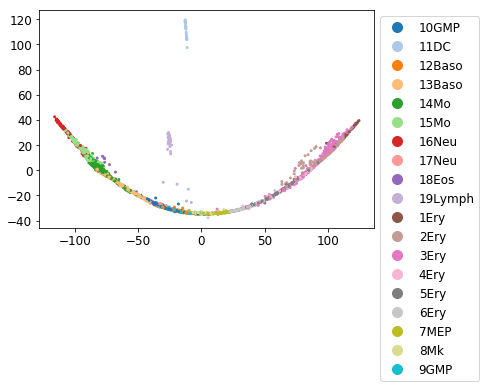

In [37]:
scprep.plot.scatter2d(data_phate, c=adata.obs['paul15_clusters'].astype(object), 
                      legend_anchor=(1,1))

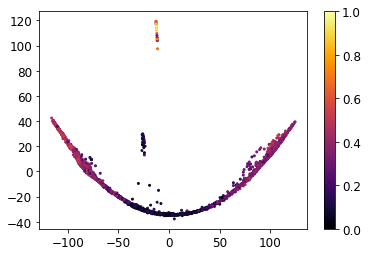

In [18]:
scprep.plot.scatter2d(data_phate, c=dpt)

In [35]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA with n_comps = 50
    finished (0:00:00)


In [38]:
sc.pp.neighbors(adata, n_neighbors=4, n_pcs=20)
sc.tl.draw_graph(adata)

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:00)
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:12)


In [44]:
adata.X.shape

(2730, 1000)

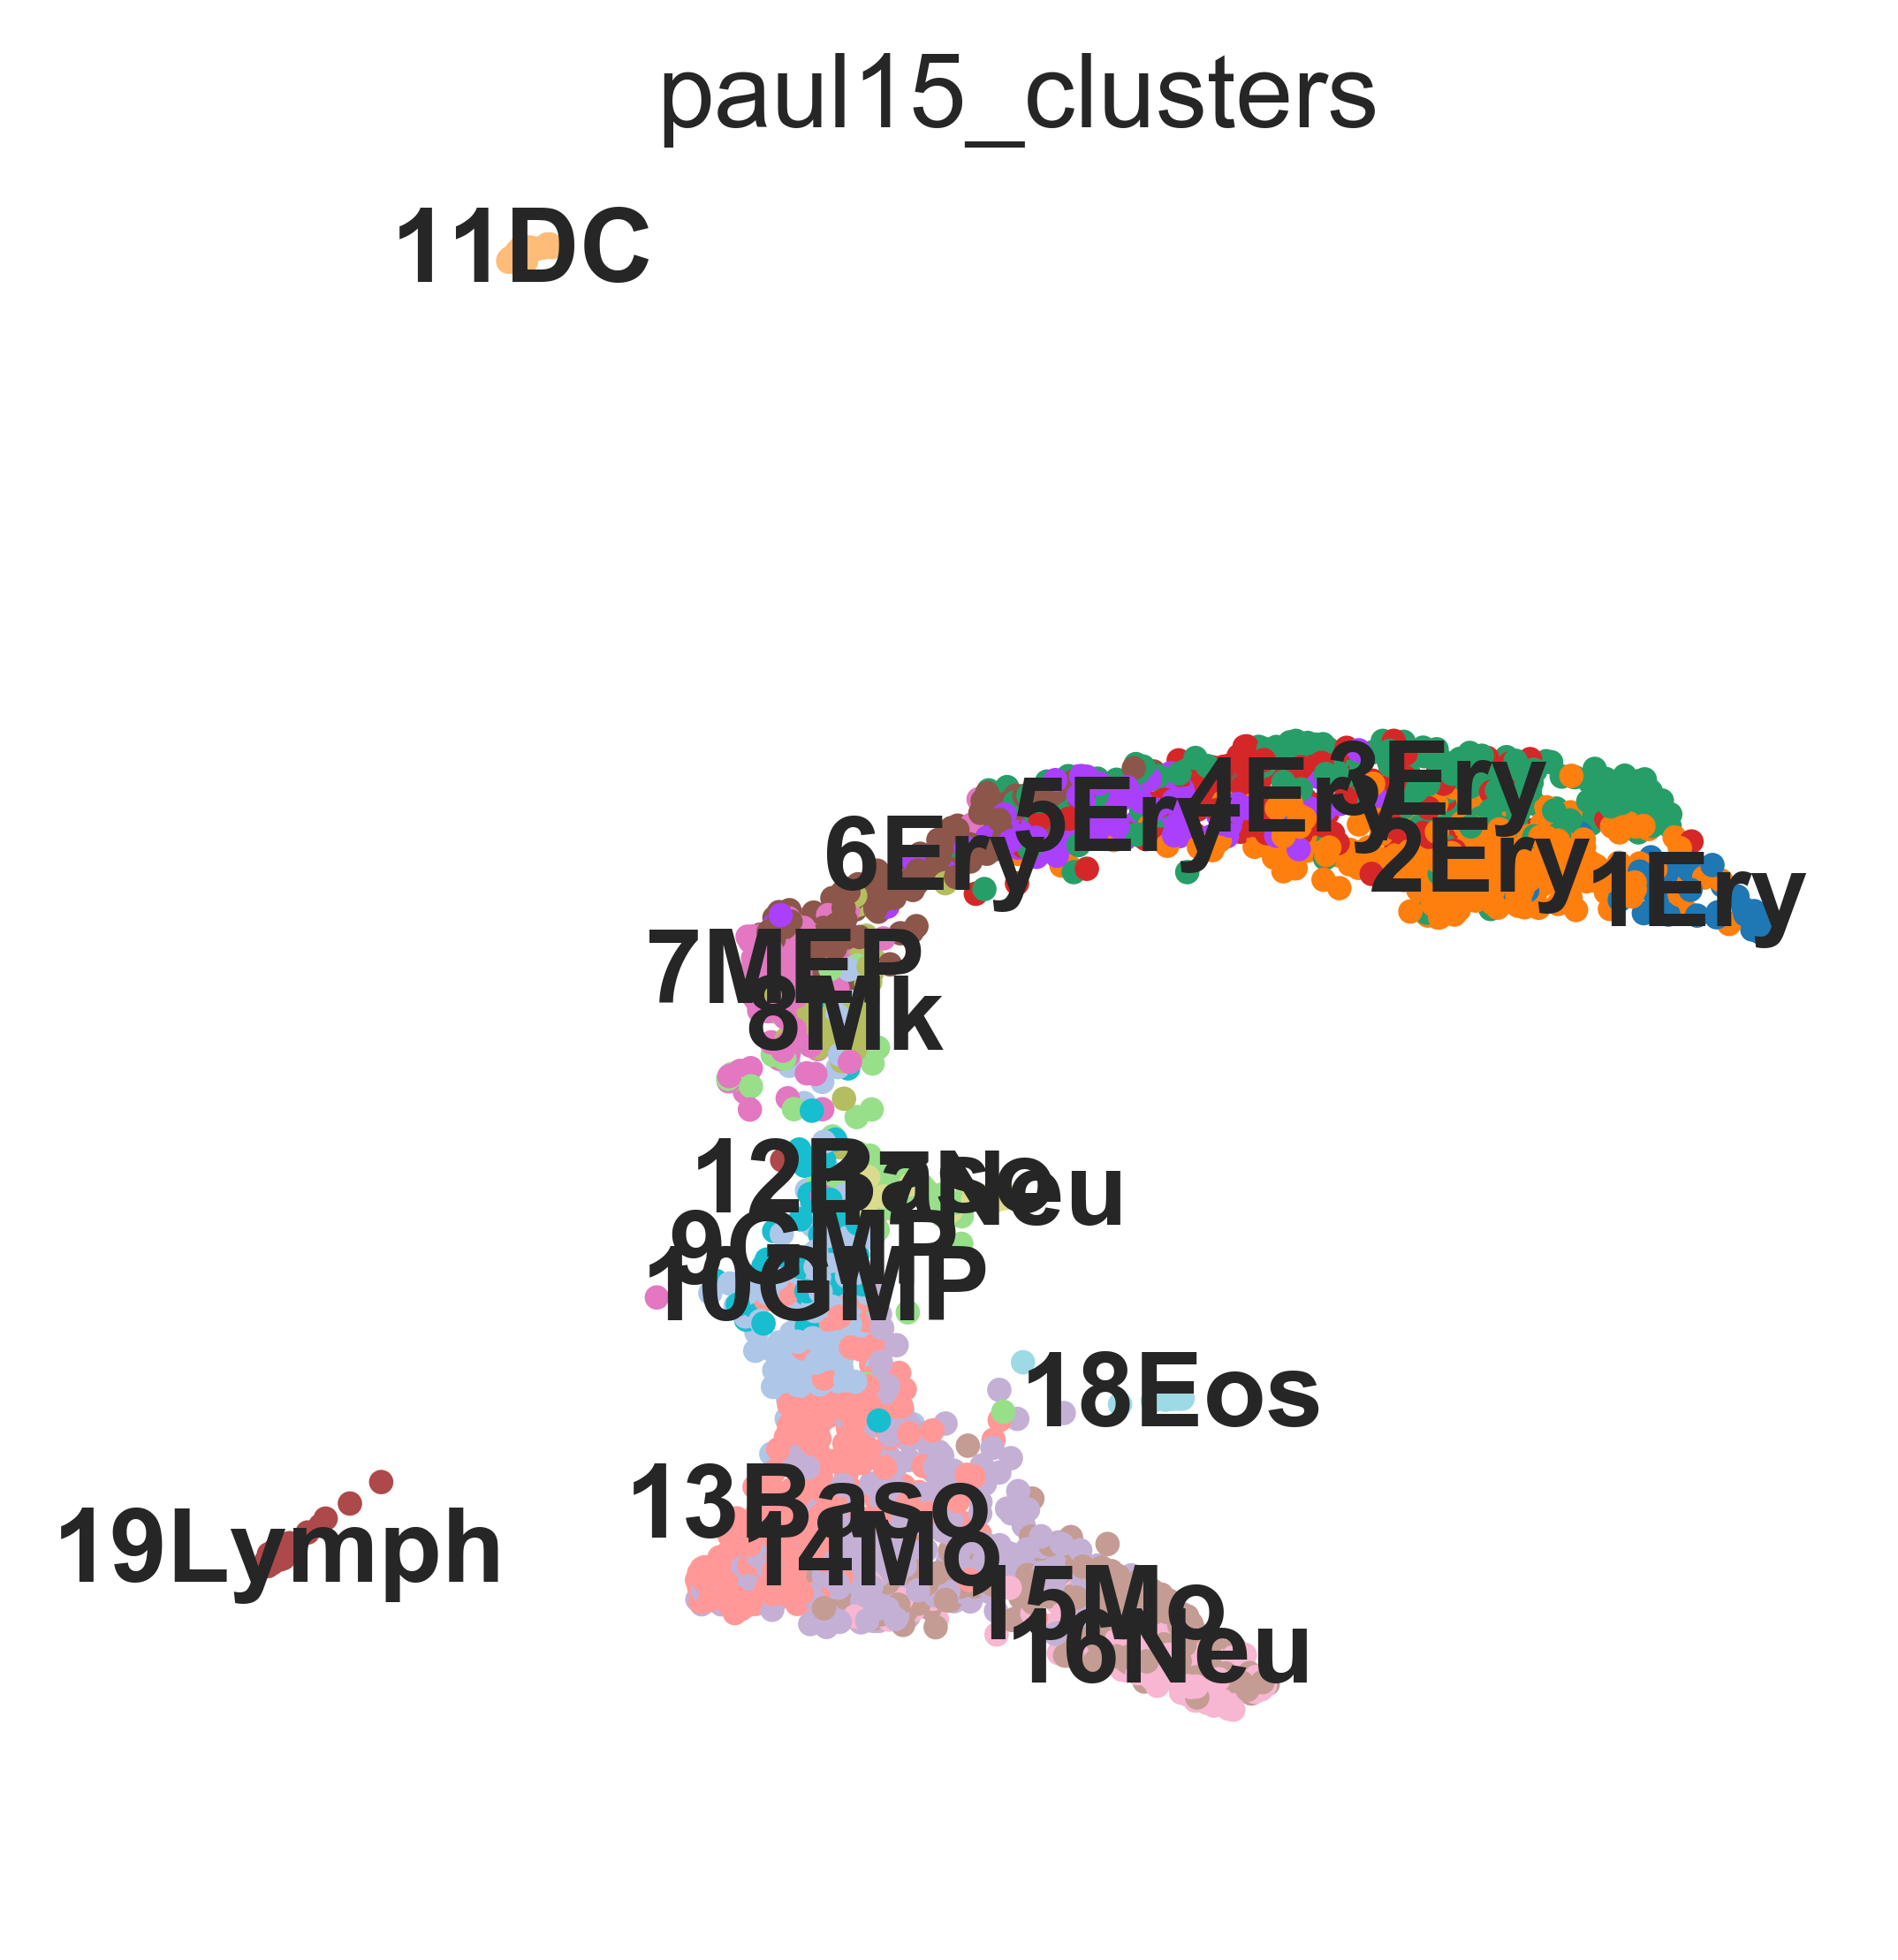

In [39]:
sc.pl.draw_graph(adata, color='paul15_clusters', legend_loc='on data')

In [40]:
sc.tl.louvain(adata, resolution=1.0)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 15 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)
